# Laboratorium 3: Sieci Neuronowe i Keras/Tensorflow

#### Import bibliotek

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.model_selection

## Część I. Stworzenie modelu klasyfikującego zdjęcia pogody (2 klasy)

#### Funkcja z notebooka flowers.ipynb

In [2]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            #image = preprocess_input(image)
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels

#### Wczytywanie obrazków

In [3]:
samples, labels = load_img('dataset1')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels

loaded 657  samples
classes {'sunrise', 'cloudy'}


#### Przykłady klas

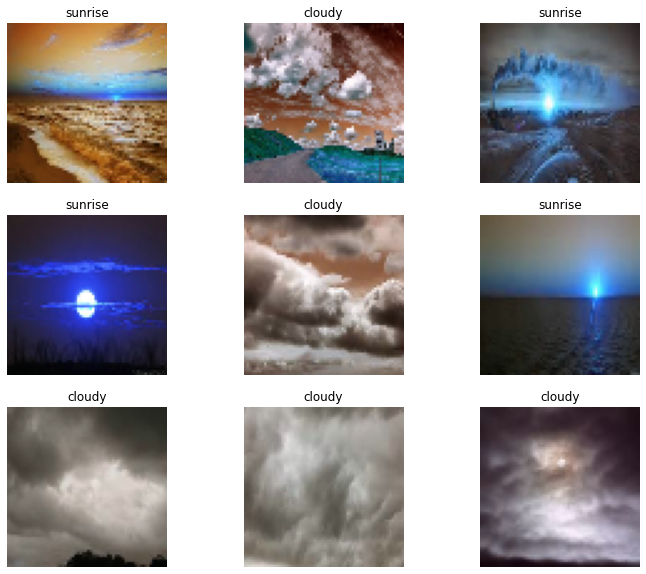

In [4]:
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

#### Przygotowanie próbek i klas

In [5]:
samples = org_samples
labels = org_labels
print("Samples shape: ",samples.shape)

# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Samples shape:  (657, 64, 64, 3)
Labels shape (657, 1)


### Tworzenie sieci CNN

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

#### Trenowanie modelu

In [7]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=42)
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [8]:
H = model.fit(trainSamples, trainLabels, epochs=35, validation_data=(testSamples,testLabels))    

Epoch 1/35
16/16 [==============================] - 2s 96ms/step - loss: 62.4342 - accuracy: 0.6921 - val_loss: 8.9291 - val_accuracy: 0.9152
Epoch 2/35
16/16 [==============================] - 1s 50ms/step - loss: 9.0776 - accuracy: 0.8925 - val_loss: 47.2000 - val_accuracy: 0.7273
Epoch 3/35
16/16 [==============================] - 1s 51ms/step - loss: 19.5770 - accuracy: 0.8620 - val_loss: 1.3541 - val_accuracy: 0.9697
Epoch 4/35
16/16 [==============================] - 1s 50ms/step - loss: 5.4608 - accuracy: 0.9149 - val_loss: 1.1281 - val_accuracy: 0.9818
Epoch 5/35
16/16 [==============================] - 1s 51ms/step - loss: 4.4971 - accuracy: 0.9365 - val_loss: 0.5469 - val_accuracy: 0.9879
Epoch 6/35
16/16 [==============================] - 1s 52ms/step - loss: 2.3660 - accuracy: 0.9606 - val_loss: 0.5227 - val_accuracy: 0.9879
Epoch 7/35
16/16 [==============================] - 1s 52ms/step - loss: 5.1216 - accuracy: 0.9221 - val_loss: 0.3746 - val_accuracy: 0.9939
Epoch 8/35

#### Testowanie modelu

In [9]:
testResults = model.predict(testSamples)
#print(testResults[:10])
#print(testLabels[:10])

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))

[[165]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Cohen's Kappa: nan
Accuracy:  1.0


c:\users\biszk\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:638: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


## Część II. Stworzenie modelu klasyfikującego zdjęcia pogody (4 klasy)

#### Wczytywanie obrazów:

In [10]:
samples, labels = load_img('dataset2')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels

loaded 1123  samples
classes {'sunrise', 'rain', 'shine', 'cloudy'}


#### Przykłady klas

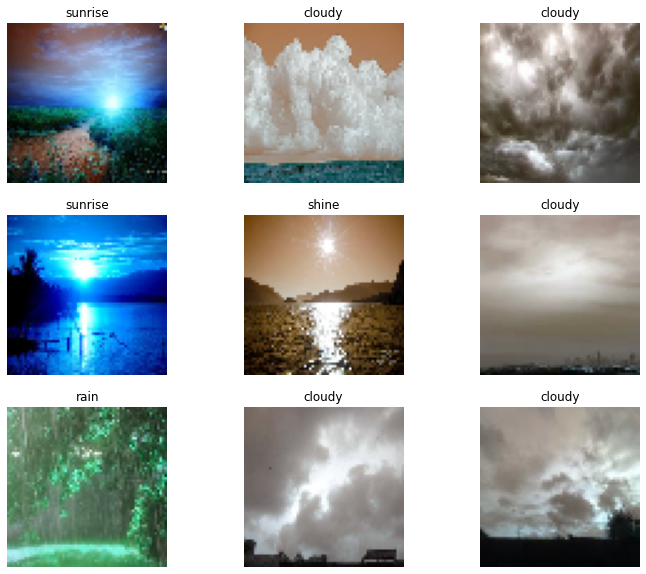

In [11]:
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

#### Przygotowanie próbek i klas:

In [12]:
samples = org_samples
labels = org_labels
print("Samples shape: ",samples.shape)

# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Samples shape:  (1123, 64, 64, 3)
Labels shape (1123, 4)


### Tworzenie sieci CNN

In [13]:
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation("relu"))
model2.add(Dense(4))
model2.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

#### Trenowanie modelu

In [14]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=42)
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [15]:
H = model2.fit(trainSamples, trainLabels, epochs=50, validation_data=(testSamples,testLabels))

Epoch 1/50
27/27 [==============================] - 2s 55ms/step - loss: 58.8222 - accuracy: 0.4509 - val_loss: 30.8749 - val_accuracy: 0.5160
Epoch 2/50
27/27 [==============================] - 1s 51ms/step - loss: 13.3030 - accuracy: 0.6337 - val_loss: 5.4806 - val_accuracy: 0.7046
Epoch 3/50
27/27 [==============================] - 1s 54ms/step - loss: 6.9411 - accuracy: 0.7122 - val_loss: 2.2359 - val_accuracy: 0.7972
Epoch 4/50
27/27 [==============================] - 1s 51ms/step - loss: 3.2824 - accuracy: 0.8187 - val_loss: 2.8192 - val_accuracy: 0.7722
Epoch 5/50
27/27 [==============================] - 1s 51ms/step - loss: 3.6131 - accuracy: 0.7611 - val_loss: 4.1025 - val_accuracy: 0.7189
Epoch 6/50
27/27 [==============================] - 1s 51ms/step - loss: 1.9262 - accuracy: 0.8462 - val_loss: 1.7062 - val_accuracy: 0.8470
Epoch 7/50
27/27 [==============================] - 1s 51ms/step - loss: 1.3059 - accuracy: 0.8832 - val_loss: 1.9658 - val_accuracy: 0.8043
Epoch 8/50

In [16]:
testResults2 = model2.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults2.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults2.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults2.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults2.argmax(axis=1)))

[[63  6  8  2]
 [ 2 48  1  2]
 [ 2  2 58  2]
 [ 1  0  0 84]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        79
           1       0.86      0.91      0.88        53
           2       0.87      0.91      0.89        64
           3       0.93      0.99      0.96        85

    accuracy                           0.90       281
   macro avg       0.90      0.90      0.90       281
weighted avg       0.90      0.90      0.90       281

Cohen's Kappa: 0.86592369169947
Accuracy:  0.900355871886121
